In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [249]:
item_spend = pd.read_csv("daata/item_spend.csv")
player_activity = pd.read_csv("daata/player_activity.csv")
player_stats = pd.read_csv("daata/player_statistics.csv")

In [ ]:
merge1 = pd.merge(player_stats, player_activity, on=['account_id', 'platform_id', 'occur_date'])
merged = pd.merge(item_spend, merge1, on=['account_id', 'platform_id', 'occur_date'])
merged['occur_date'] = pd.to_datetime(merged['occur_date'])
merged['first_day_played'] = pd.to_datetime(merged['occur_date'])
merged

,account_id,platform_id,occur_date,item,item_type,item_sub_type,money_spent,ltd_days_played,first_day_played,evc_balance,...,activity_type,time_spent,kills,deaths,suicides,money_earned,rp_earned,success,money_vs_time_spent,rp_vs_time_spent
0,1295,PS4,2020-10-24,Imponte Dukes,CAR,MUSCLE,24734.421380,308,2020-10-24,725717.53060,...,Heist,4.036578,21,0,0,46285.128330,1529.107568,1,11466.675770,379.060596
1,1295,PS4,2020-10-24,Imponte Dukes,CAR,MUSCLE,24734.421380,308,2020-10-24,725717.53060,...,Race,0.996677,0,0,0,779.517122,294.887483,1,783.119435,296.873998
2,1295,PS4,2020-10-24,Imponte Dukes,CAR,MUSCLE,24734.421380,308,2020-10-24,725717.53060,...,Gunrunner,1.475342,0,0,0,55657.522530,497.001376,0,37725.855410,337.549886
3,1295,PS4,2020-10-24,Imponte Dukes,CAR,MUSCLE,24734.421380,308,2020-10-24,725717.53060,...,Nightclub Owner,1.848230,0,0,0,167211.099800,497.001376,0,90471.473550,269.447716
4,1295,PS4,2020-10-24,Imponte Dukes,CAR,MUSCLE,24734.421380,308,2020-10-24,725717.53060,...,Race,1.004437,0,0,0,231.256746,126.569684,1,231.230684,127.006107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932102,3497,PC,2020-09-02,Bullpup Rifle,WEAPON,ASSAULT RIFLES,5784.663066,90,2020-09-02,20349.25273,...,Heist,1.816086,31,0,0,0.000000,339.617607,1,0.550635,187.555878
932103,103,PS4,2020-11-23,Tear Gas,WEAPON,PROJECTILES,58.644515,105,2020-11-23,719634.60660,...,Executive,2.956087,0,0,0,29881.489690,1954.872080,1,10108.798070,661.642190
932104,103,PS4,2020-11-23,Tear Gas,WEAPON,PROJECTILES,58.644515,105,2020-11-23,719634.60660,...,Executive,2.215714,0,0,0,0.000000,861.469052,1,0.451322,389.250996
932105,103,PS4,2020-11-23,Tear Gas,WEAPON,PROJECTILES,58.644515,105,2020-11-23,719634.60660,...,Biker,0.064850,0,0,0,0.000000,0.000000,0,15.420158,15.420158


In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932107 entries, 0 to 932106
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   account_id           932107 non-null  int64         
 1   platform_id          932107 non-null  object        
 2   occur_date           932107 non-null  datetime64[ns]
 3   item                 914845 non-null  object        
 4   item_type            929752 non-null  object        
 5   item_sub_type        928866 non-null  object        
 6   money_spent          932107 non-null  float64       
 7   ltd_days_played      932107 non-null  int64         
 8   first_day_played     932107 non-null  datetime64[ns]
 9   evc_balance          932107 non-null  float64       
 10  pvc_balance          932107 non-null  float64       
 11  char_rank            932107 non-null  int64         
 12  daily_playtime       932107 non-null  float64       
 13  days_since_fir

In [252]:
ordered = (merged
     .sort_values(by=['account_id', 'platform_id', 'occur_date'], ascending=[True, False, True]))

In [253]:
# get individual consoles
ps4 = merged[merged['platform_id'] == 'PS4']
xbox = merged[merged['platform_id'] == 'XBOX']
pc = merged[merged['platform_id'] == 'PC']

In [254]:
# order by most recent transaction
recentPs4 = (ps4.sort_values(by=['account_id', 'occur_date'], ascending=[True, False])
            .drop_duplicates(subset=['account_id']))
recentXbox = (xbox.sort_values(by=['account_id', 'occur_date'], ascending=[True, False])
            .drop_duplicates(subset=['account_id']))
recentPc = (pc.sort_values(by=['account_id', 'occur_date'], ascending=[True, False])
            .drop_duplicates(subset=['account_id']))

In [ ]:
# checks for active players with at least some stat under kills/deaths/suicides
recentPs4 = recentPs4[
    (recentPs4['kills'] != 0) | 
    (recentPs4['deaths'] != 0) |
    (recentPs4['suicides'] != 0)
]

recentXbox = recentXbox[
    (recentXbox['kills'] != 0) | 
    (recentXbox['deaths'] != 0) |
    (recentXbox['suicides'] != 0)
]

recentPc = recentPc[
    (recentPc['kills'] != 0) | 
    (recentPc['deaths'] != 0) |
    (recentPc['suicides'] != 0)
]

recentPs4

,account_id,platform_id,occur_date,item,item_type,item_sub_type,money_spent,ltd_days_played,first_day_played,evc_balance,...,activity_type,time_spent,kills,deaths,suicides,money_earned,rp_earned,success,money_vs_time_spent,rp_vs_time_spent
766084,34,PS4,2020-11-12,Annis Elegy RH8,CAR,SPORT,0.000000e+00,582,2020-11-12,6.148490e+06,...,Heist,0.464225,5,1,0,0.0,412.179808,0,2.154130,890.042898
906026,61,PS4,2020-10-15,Cruiser,CYCLE,CYCLE,3.191538e+02,432,2020-10-15,3.619788e+03,...,Heist,1.484367,21,0,0,0.0,533.448144,1,0.673688,360.051326
694269,69,PS4,2020-11-29,Assault Shotgun,WEAPON,SHOTGUNS,3.829846e+03,116,2020-11-29,2.034641e+03,...,Heist,1.242962,1,0,0,0.0,99.400275,0,0.804530,80.775032
748035,99,PS4,2020-11-12,Antique Cavary Dagger,WEAPON,MELEE,7.819269e+02,142,2020-11-12,5.019444e+04,...,Biker,3.755906,0,27,0,0.0,0.000000,0,0.266247,0.266247
875090,135,PS4,2020-09-27,Oppressor Mk II,BIKE,MOTORCYCLE,1.551985e+06,28,2020-09-27,2.783440e+04,...,Heist,4.598959,3,0,0,0.0,497.001376,1,0.217441,108.285686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257699,9444,PS4,2020-11-26,Dinka Double-T,BIKE,MOTORCYCLE,4.787307e+03,69,2020-11-26,2.577627e+04,...,Heist,3.264126,5,0,0,0.0,331.334251,0,0.306361,101.814172
750529,9446,PS4,2020-11-14,Vapid Caracara 4x4,CAR,OFF_ROAD,3.490745e+05,708,2020-11-14,9.124350e+04,...,Heist,1.438896,9,0,0,0.0,125.907015,1,0.694977,88.197504
708776,9449,PS4,2020-09-16,Coquette D10,CAR,SPORTS,6.024028e+05,530,2020-09-16,4.474928e+05,...,Biker,3.410039,0,7,0,0.0,0.000000,0,0.293252,0.293252
10006,9473,PS4,2020-09-15,Dinka Double-T,BIKE,MOTORCYCLE,4.787307e+03,128,2020-09-15,5.587129e+04,...,Biker,4.458450,0,75,0,0.0,0.000000,0,0.224293,0.224293


In [ ]:
# creating 3 clusters 
scalerPs4 = StandardScaler()
scalerXbox = StandardScaler()
scalerPc = StandardScaler()

scaledDataPs4 = scalerPs4.fit_transform(recentPs4[['char_rank']])
scaledDataXbox = scalerXbox.fit_transform(recentXbox[['char_rank']])
scaledDataPc = scalerPc.fit_transform(recentPc[['char_rank']])

kmeansPs4 = KMeans(n_clusters=3)
kmeansPs4.fit(scaledDataPs4)
recentPs4['cluster'] = kmeansPs4.labels_

kmeansXbox = KMeans(n_clusters=3)
kmeansXbox.fit(scaledDataXbox)
recentXbox['cluster'] = kmeansXbox.labels_

kmeansPc = KMeans(n_clusters=3)
kmeansPc.fit(scaledDataPc)
recentPc['cluster'] = kmeansPc.labels_

recentPs4 = recentPs4.sort_values(by=['char_rank', 'cluster'], ascending=[True, True])
recentXbox = recentXbox.sort_values(by=['char_rank', 'cluster'], ascending=[True, True])
recentPc = recentPc.sort_values(by=['char_rank', 'cluster'], ascending=[True, True])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [1]:
# gets order unique clusters based on rank
uniquePs4 = recentPs4['cluster'].unique()
uniqueXbx = recentXbox['cluster'].unique()
uniquePc = recentPc['cluster'].unique()

NameError: name 'recentPs4' is not defined

In [ ]:
# sets order of displaying character rank (ps4)
c0Ps = recentPs4[recentPs4['cluster'] == uniquePs4[0]][['char_rank', 'cluster']]
c0RankPs = "{} - {}".format(min(c0Ps['char_rank']), max(c0Ps['char_rank']))
c1Ps = recentPs4[recentPs4['cluster'] == uniquePs4[1]][['char_rank', 'cluster']]
c1RankPs = "{} - {}".format(min(c1Ps['char_rank']), max(c1Ps['char_rank']))
c2Ps = recentPs4[recentPs4['cluster'] == uniquePs4[2]][['char_rank', 'cluster']]
c2RankPs = "{} - {}".format(min(c2Ps['char_rank']), max(c2Ps['char_rank']))

In [ ]:
# sets order of displaying character rank (xbox)
c0X = recentXbox[recentXbox['cluster'] == uniqueXbx[0]][['char_rank', 'cluster']]
c0RankX = "{} - {}".format(min(c0X['char_rank']), max(c0X['char_rank']))
c1X = recentXbox[recentXbox['cluster'] == uniqueXbx[1]][['char_rank', 'cluster']]
c1RankX = "{} - {}".format(min(c1X['char_rank']), max(c1X['char_rank']))
c2X = recentXbox[recentXbox['cluster'] == uniqueXbx[2]][['char_rank', 'cluster']]
c2RankX = "{} - {}".format(min(c2X['char_rank']), max(c2X['char_rank']))

In [ ]:
# sets order of displaying character rank (pc)
c0P = recentPc[recentPc['cluster'] == uniquePc[0]][['char_rank', 'cluster']]
c0RankP = "{} - {}".format(min(c0P['char_rank']), max(c0P['char_rank']))
c1P = recentPc[recentPc['cluster'] == uniquePc[1]][['char_rank', 'cluster']]
c1RankP = "{} - {}".format(min(c1P['char_rank']), max(c1P['char_rank']))
c2P = recentPc[recentPc['cluster'] == uniquePc[2]][['char_rank', 'cluster']]
c2RankP = "{} - {}".format(min(c2P['char_rank']), max(c2P['char_rank']))

Text(0, 0.5, '# of Characters in Each Cluster')

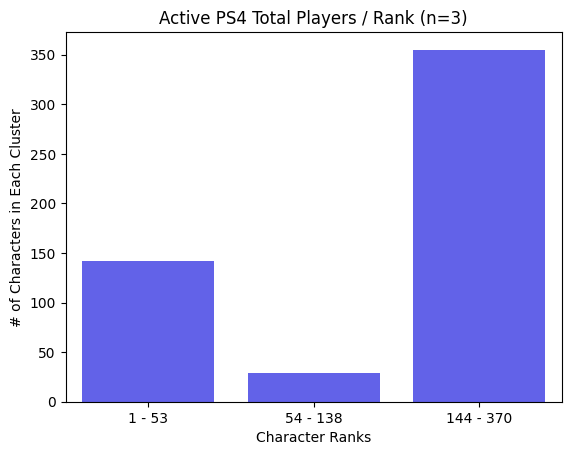

In [ ]:
#ps4 chart
new_label_ps4 = [c0RankPs, c1RankPs, c2RankPs]

# set the new labels
ps4Rank = sns.countplot(data=recentPs4, x='cluster', color='blue', alpha=0.7)
ps4Rank.set_xticks(range(len(new_label_ps4)))
ps4Rank.set_xticklabels(new_label_ps4)
ps4Rank.set_title('Active PS4 Total Players / Rank (n=3)')
ps4Rank.set_xlabel('Character Ranks')
ps4Rank.set_ylabel('# of Characters in Each Cluster')

Text(0, 0.5, '# of Characters in Each Cluster')

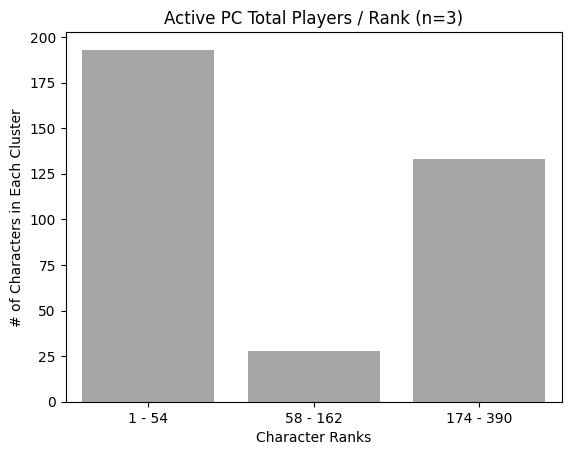

In [ ]:
# pc chart
new_label_pc = [c0RankP, c1RankP, c2RankP]

pcRank = sns.countplot(data=recentPc, x='cluster', color='grey', alpha=0.7)
pcRank.set_xticks(range(len(new_label_pc)))
pcRank.set_xticklabels(new_label_pc)
pcRank.set_title('Active PC Total Players / Rank (n=3)')
pcRank.set_xlabel('Character Ranks')
pcRank.set_ylabel('# of Characters in Each Cluster')

Text(0, 0.5, '# of Characters in Each Cluster')

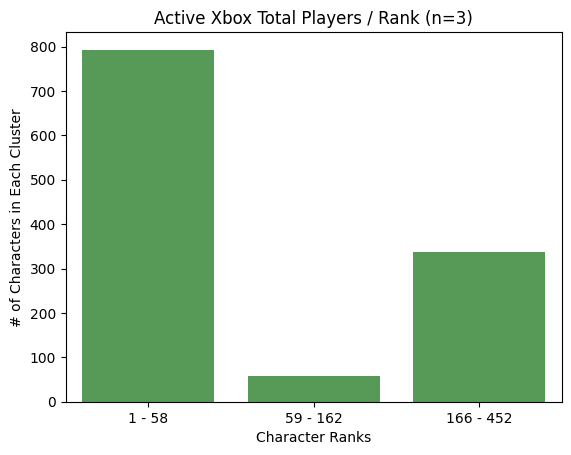

In [ ]:
# xbox chart
new_label_xbx = [c0RankX, c1RankX, c2RankX]

xbxRank = sns.countplot(data=recentXbox, x='cluster', color='green', alpha=0.7)
xbxRank.set_xticks(range(len(new_label_xbx)))
xbxRank.set_xticklabels(new_label_xbx)
xbxRank.set_title('Active Xbox Total Players / Rank (n=3)')
xbxRank.set_xlabel('Character Ranks')
xbxRank.set_ylabel('# of Characters in Each Cluster')